### Christian Roth und Andreas Waßmus:

# Major Assignment: Used Car Sales Analysis


### Kurs: Programming for Data Science
### Programmiersprache Python

Angewendete Pakte:

In [70]:
import pandas as pd
import numpy as np
#import seaborn as sns

## 1. Beschreibung Use Case

## 1. Beschreibung Use Case

Der Verkauf von Kraftfahrzeugen (PKW) ist in Deutschland ein großer und wichtiger Markt. Untergliedert in Neu- und Gebrauchtwagen hat er in 2019 ein Volumen von 191,7 Mrd. EUR. Dabei macht der Verkauf von Gebrauchtwagen mit einem Umsatz von 84,7 Mrd. EUR 44,2% des Marktes aus. Der Gebrauchtwagen ist zu zwei Dritteln gewerblich und einem Drittel privat organisiert. Ca. 5 Mio. Deutsche überlegen sich in den kommenden Jahren einen neuen Gebrauchtwagen zuzulegen. (Quelle: destatis, abgerufen am 23.08.2019, https://de.statista.com/themen/1377/gebrauchtwagenhandel/)



Folie1.png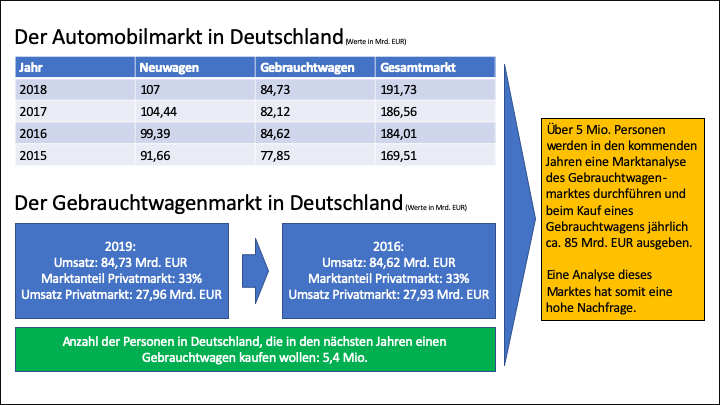



Im vorliegenden Assignment soll eine Analyse des Gebrauchtwagenmarktes in Deutschland durchgeführt werden. Dazu sollen die Verkäufe in diesem Teilsegments näher betrachtet werden. Um Verkaufsdaten zu generieren, wurde überlegt, Plattformen wie mobile.de zu crawlen und die Daten auszuwerten. Ein solcher Crawler hätte den Vorteil einen aktuellen Blick in den Gebrauchtwagenmarkt zu erhalten, ist aber recht umfangreich zu programmieren und hat das Risko, keine Daten zu bekommen, da Marktplätze ein Crawling ihrerseits verhindern. Daher wurde das Web nach frei verfügbaren Datensätzen über Gebrauchtwagenverkäufe durchsucht. Es wurde ein Datensatz in Kaggle aus dem Jahr 2016 gefunden, der sich sehr gut für diese Analyse nutzen lässt. Ausgehend von einem Privatmarktanteil im Gebrauchtwagenmarkt von 33% weißt das Jahr 2016 mit 27,93 Mrd. EUR zudem eine sehr ähnliche Größe wie das letzte Jahr 2018 aus. Somit ist auch die Aktualität bezogen auf die Marktgröße gegeben.

Im Zuge der Analyse wird der Datensatz mit weiteren Datenpunkten gezielt angereichert, um zusätzliche regionale bzw. geographische Aspekte sowie Unternehmenszugehörigkeiten von Marken darzustellen.

Wir haben verschiedene CSV gefunden, die wir in den Datensatz eingebaut haben:
•	Postleitzahlen
•	Einwohner je Postleitzahl
•	Bundesländer
•	Automarken und deren Zugehörigkeit zu Automobilkonzernen

•	Crawling (bearbeiten wir gerade, schauen ob das noch klappt)
Wir wollen von einer Webseite die Marken-Logos crawlen und als Dictionary in die Analyse einbauen (bspw. können dann die Logos der Marken bei Umsätzen und Marktanteilen präsentiert werden).

Im Rahmen des Assignments wird den folgenden Fragestellen zum privaten Gebrauchtwagenmarkt nachgegangen:

(alle Fragen von statista, sind aber kostenpflichtig)

- Wie ist das Durchschnittsalter von Gebrauchtwagen?
- Wie ist der durchschnittliche Kilometerstand von Gebrauchtwagen im Privatmarkt?
- Wie ist der durchschnittliche Verkaufspreis der Fahrzeuge im Privatmarkt?
- Wo sind die Preise am teuersten, wo am günstigsten?


Weitere mögliche Fragestellungen (hier werden wir uns noch fokussieren:

- Welche Marktanteile von Marken gibt es im Gebrauchtwagenmarkt?
- Wie sieht die Verteilung der Marktanteile in Bezug auf Automobilkonzerne dar?

weitere Marktcharakteristika:
- Wie sieht die Verteilung bei Diesel und Benzin aus?
- Welche Fahrzeugform haben die Autos?
- Wie viel PS haben die Autos?
- Wie lange ist eine Anzeige durchschnittlich online, bis das Auto verkauft wird?

Wie entwickeln/unterscheiden sich die Preise? Welche Fahrzeuge erzielen höhere Verkaufspreise?
- Welche Merkmale eines Autos haben einen Einfluss auf die Angebotspreise? (Korrelationen)
- Wie sieht die Verteilung der Preise für PKW in Bezug auf das Zulassungsjahr aus?
- Wie sieht die Verteilung der Preise in Bezug auf Kilometerleistung aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Leistung von PKW aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Kraftstoffart aus?
- Welche Marken erzielen die höchsten Preise?

Wie ist der Markt geografisch aufgeteilt?
- Wo werden besonders viele Autos angeboten bzw. verkauft?

Weitere Ideen (Stoff über das Assignment hinaus):
•	Vorbereitung und Durchführen einer Regression
•	Prediction von Angebotspreisen


## 2. Daten


Für die Analyse wird ein Datensatz aus Kaggle verwendet. Diese dort zur Verfügung gestellten Daten wurden im Jahr 2016 mit Scrapy von Ebay-Kleinanzeigen gecrawled. Es handelt sich um 371.528 Datensätze.

Datensatz: https://www.kaggle.com/orgesleka/used-cars-database




#### 1. Beschreibung und Einlesen der Daten:

Je Datensatz wurden folgende 19 Datenpunkte gesammelt:

- dateCrawled: Datum, wann die Anzeige das erste mal gecrawlt wurde (alle Feldwerte stammen von diesem Datum, Index)
- name: "Name" des Autos (Anzeigenname)
- seller: Gewerblicher oder privater Verkäufer
- offerType: Handelt es sich um Angebote oder Gesuche
- price : Der Angebotspreis der Anzeige (kein finaler Verkaufspreis) 
- abtest: Ausprägungen "test" und "control" (diese Spalte ist für die Analyse nicht relevant)
- vehicleType: Fahrzeugform, Kategorien von verschiedenen Fahrzeugtypen
- yearOfRegistration: Jahr der Erstzulassug
- gearbox: Getriebeart
- powerPS: Leistung in PS
- model: Modellname des Herstellers
- kilometer: Kilometerstand bei Verkauf
- monthOfRegistration: Monat der Erstzulassung
- fuelType: Kraftstoffart
- brand: Automarke
- notRepairedDamage: Nicht-reparierter Schaden am Auto (Variable lässt keine Aussage über die Höhe der unfallfreien Fahrzeuge zu
- dateCreated: Erstelldatum der Anzeige
- nrOfPictures: Fehlerhafter Spalte wird im Rahmen der Datenbereinigung aus Analyse entfernt
- postalCode: Postleitzahl
- lastSeenOnline: Wann wurde die Anzeige das letzte Mal vom crawler gesehen?






In [71]:
#Initialize relative path of csv-file
relpathCar="../MajorAssignment/used-cars-database/autos.csv"

#import csv-file into pandas df
df_carData=pd.read_csv(relpathCar,sep=",",encoding="latin-1", index_col=0)


In [72]:
print(df_carData.shape)
print('----------')
print(df_carData.columns)

(371528, 19)
----------
Index(['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')


#### 2. Einbindung zusätzlicher Daten

Der Datensatz wurde dahingehend überprüft, ob es Sinn macht, an bestimmten Stellen Daten anzureichern. Hierzu kommen zwei Spalten in Betracht:
- brand
- postalCode

Zur Marke (brand) der PKWs wird eine CSV-Tabelle mit Konzernzugehörigkeiten der einzelnen Marken eingespielt. Diese CSV wurde selbst erstellt, da keine freiverfügbare Liste oder CSV-Datei gefunden wurde und hier ebenfalls ein Crawling-Prozess in Anbetracht des geringen Informationsgehalts dieser Datei zu aufwendig gewesen wäre. Daher war es effizienter und schneller diese Datei selber zu erstellen.

Bzgl. der Postleitzahlen (postalCode) wurden mehrer Datenbanken durchsucht und verschiedene CSV-Dateien gefunden, sodass zu den Postleitzahlen der Name und die Längen- und Breitengrade des Orts sowie dessen Einwohnerzahl hinzugefügt werden können. Darüber hinaus können die Postleitzahlen einem Bundesland zugeordnet werden. Diese Dateien wurden von http://www.fa-technik.adfc.de/code/opengeodb/PLZ.tab, https://www.suche-postleitzahl.org/downloads und https://excel-karte.de/wp-content/uploads/2016/12/Liste-der-PLZ-in-Excel-Karte-Deutschland-Postleitzahlen.xlsx heruntergeladen (24.08.2019) und werden in diesem Abschnitt in einen Dataframe zusammengeführt



In [73]:
#Initialize relative path of csv-file for other data
relpathKON="../MajorAssignment/Autokonzerne.csv"
relpathPLZ="../MajorAssignment/PLZ.csv"
relpathEIN="../MajorAssignment/plz_einwohner.csv"
relpathBUN="../MajorAssignment/plz_bundesland.csv"

In [74]:
#Konzernmarken einlesen
df_companies=pd.read_csv(relpathKON,sep=";",encoding="UTF-8")

#Alternative wäre geopy gewesen, aber funktioniert bei sovielen Zeilen wegen HTTP429 To many requests nicht
df_lonlat = pd.read_csv(relpathPLZ, sep='\t', encoding="utf-8")

#Einwohner je PLZ einlesen
df_population=pd.read_csv(relpathEIN,sep=",",encoding="UTF-8")

#Einwohner je PLZ einlesen
df_bundesland=pd.read_csv(relpathBUN,sep=";",encoding="UTF-8")
df_bundesland=df_bundesland.rename(columns = {'PLZ':'plz'})


In [75]:
df_bundesland.head()

plz Bundesland    Kreis    Typ
0  1067    Sachsen  Dresden  Stadt
1  1069    Sachsen  Dresden  Stadt
2  1097    Sachsen  Dresden  Stadt
3  1099    Sachsen  Dresden  Stadt
4  1108    Sachsen  Dresden  Stadt

In [76]:
#df_population und df_lonlat und df_bundesland auf Basis von plz zusammenführen
df_postalCodeInfo = df_lonlat.merge(df_population, on='plz', how='left')
df_postalCodeInfo = pd.merge(df_postalCodeInfo,df_bundesland[['plz','Bundesland']],on='plz', how='left')
df_postalCodeInfo.head()

#loc_id   plz        lon        lat      Ort  einwohner Bundesland
0     5078  1067  13.721068  51.060034  Dresden    11957.0    Sachsen
1     5079  1069  13.738907  51.039559  Dresden    25491.0    Sachsen
2     5080  1097  13.743967  51.066745  Dresden    14811.0    Sachsen
3     5081  1099  13.828980  51.092619  Dresden    28021.0    Sachsen
4   153646  1108  13.828980  51.092619  Dresden     5876.0    Sachsen

## 3. Data preparation

In diesem Abschnitt werden die Daten aufbereitet und bereinigt, so dass sie im Anschluss analysiert werden können. 

#### 3.1 Übersicht und Einfinden in die Datensätze

In [77]:
#Rename postalCode zu plz
df_carData=df_carData.rename(columns = {'postalCode':'plz'})
#df_carData #zur Überprüfung

Die Zeit, die eine Anzeige online ist, gibt Aufschluss darüber, wie groß die Nachfrage nach dem PKW ist und wie gut das Angebot war. Um die Online-Dauer einer Anzeige zu berechnen, wird die Spalte "offerTime" hinzugefügt und wie folgt berechnet:

Erstellungsdatum der Anzeige - Letztmaliger Anzeigenaufruf möglich = Anzahl der Tage Online

In [78]:
#Column dateCreated & lastSeen in Datetime umwandeln 
#dt.normalize() um die Anzeige und nicht dtype selbst zu verändern
df_carData["dateCreated"] = pd.to_datetime(df_carData["dateCreated"]).dt.normalize()
df_carData["lastSeen"] = pd.to_datetime(df_carData["lastSeen"]).dt.normalize()

#Added Column offerTime to calculate how long the car was online before it was sold 
df_carData["offerTime"]  = (df_carData["lastSeen"] - df_carData["dateCreated"]).dt.days

#Check dtypes, ob Umwandlung erfolgreich.
#df_carData.dtypes
df_carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 20 columns):
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null datetime64[ns]
nrOfPictures           371528 non-null int64
plz                    371528 non-null int64
lastSeen               371528 non-

In [79]:
#show head of carData df
df_carData.head(5)

name  seller offerType  price  \
dateCrawled                                                                    
2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot    480   
2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   

                    abtest vehicleType  yearOfRegistration    gearbox  \
dateCrawled                                                             
2016-03-24 11:52:17   test         NaN                1993    manuell   
2016-03-24 10:58:45   test       coupe                2011    manuell   
2016-03-14 12:52:21   test         suv                2004  automatik   
2016-03-17 16:54:04   test  kleinwagen                2001    manuell   
2016-03-31 17:25:20   test  kleinwagen                2008    manuell   

                     powerPS  model  kilometer  monthOfRegistration fuelType  \
dateCrawled                                                                    
2016-03-24 11:52:17        0   golf     150000                    0   benzin   
2016-03-24 10:58:45      190    NaN     125000                    5   diesel   
2016-03-14 12:52:21      163  grand     125000                    8   diesel   
2016-03-17 16:54:04       75   golf     150000                    6   benzin   
2016-03-31 17:25:20       69  fabia      90000                    7   diesel   

                          brand notRepairedDamage dateCreated  nrOfPictures  \
dateCrawled                                                                   
2016-03-24 11:52:17  volkswagen               NaN  2016-03-24             0   
2016-03-24 10:58:45        audi                ja  2016-03-24             0   
2016-03-14 12:52:21        jeep               NaN  2016-03-14             0   
2016-03-17 16:54:04  volkswagen              nein  2016-03-17             0   
2016-03-31 17:25:20       skoda              nein  2016-03-31             0   

                       plz   lastSeen  offerTime  
dateCrawled                                       
2016-03-24 11:52:17  70435 2016-04-07         14  
2016-03-24 10:58:45  66954 2016-04-07         14  
2016-03-14 12:52:21  90480 2016-04-05         22  
2016-03-17 16:54:04  91074 2016-03-17          0  
2016-03-31 17:25:20  60437 2016-04-06          6

#### 3.2 Umgang mit fehlenden und nicht benötigten Werten:

##### Fehlende Werte:

Grundsätzlich gibt es drei Möglichkeiten, mit den fehlenden Werten umzugehen: 

- 1. Wir löschen alle unvollständigen Datensätze.
- 2. Wir belassen die unvollständigen Datensätze im Dataset und verwenden für bestimmte Analyse nur die vollständigen Datensätze.
- 3. Wir ersetzen die fehlenden Werte.

Für die hier durchgeführte deskriptive Analyse reicht es zunächst aus, die fehlenden Werte (NaN values) im Datensatz zu belassen. Zur eindeutigen Kennzeichnung werden diese mit einen (-) ersetzt. Wir gehen somit mit Option 2 vor und werden, falls notwendig, für bestimmte deskriptive Analysen (bspw. Korrelationen) nur vollständige Datensätze zulassen. Für tiefergehende Analysen ist zu prüfen, inwieweit diese Werte ersetzt werden können oder ob man mit Option 1 verfahren muss.

Insgeamt gibt es 5 Spalten mit fehlenden Werten:

In [80]:
#Check NaN values 
df_carData.isna().sum()

name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
plz                        0
lastSeen                   0
offerTime                  0
dtype: int64

NaN-Werte werden mit "-" ersetzt. Neben diesen Werten gibt es beim Attribut "monthOfRegistration" den Wert 0 als fehlenden Wert oder keine Angabe. Dieser Wert wird nicht mit"-"ersetzt, da es ein numerisches Feld ist und ansonsten das Attribut nicht für weitere Kalkulationen benutzt werden kann.

In [81]:
#Fill missing values with "-"
df_carData = df_carData.fillna("-")
#df_carData.head()

Erneute Überprüfung ob alle fehlenden Werte ersetzt wurden

In [82]:
df_carData.isna().sum()

name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
plz                    0
lastSeen               0
offerTime              0
dtype: int64

##### Nicht benötigte Attribute

Im nächsten Schritt wird der Datensatz um Gesuche (beim Attribut "offerType") bereinigt, sodass nur Angebote im Datensatz vorhanden sind. Dadurch verliert das Attribut "offerType" seine Daseinsberechtigung und kann gelöscht werden. Ebenso wird mit dem Attribut "seller" verfahren. Zusätzlich werden die Spalten "nrOfPictures" (Fehler beim crawlen) und "abtest" gelöscht, da diese Spalten keinen Mehrwert für die nachfolgenden Analysen generieren und somit ebenfalls nicht benötigt werden.

In [83]:
#Ausprägungen einer Spalte anzeigen lassen
df_carData["offerType"].value_counts() 

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [84]:
#12 Gesuche löschen -> 371516 Angebote...
df_carData = df_carData[df_carData.offerType != "Gesuch"]

In [85]:
#Ausprägungen einer Spalte anzeigen lassen
df_carData["seller"].value_counts() 

privat        371513
gewerblich         3
Name: seller, dtype: int64

In [86]:
#3 gewerbliche Angebote löschen -> 371513 Angebote...
df_carData = df_carData[df_carData.seller != "gewerblich"]

In [87]:
#Löschen der zuvor genannten Spalten - delete the columns without having to reassign (inplace)
df_carData.drop(['nrOfPictures','seller', 'offerType', 'abtest'], axis=1, inplace=True)

In [88]:
print(df_carData.shape)

(371513, 16)


Der Daten werden somit auf 371513 Datensätze mit 16 Attributen reduziert.

Bei der Sichtung der Daten ist auffällig, dass viele PKW zum Preis 0 EUR angeboten werden und bei den angeboten weiterhin Begriffe wie Suche, Ankauf, Tausch, Schenkung, u.w. auftauchen. Schaut man sich dies genauer ist, so ist das zu einem großen Anteil mit dem Preis 0-100 EUR verbunden. Daher werden zunächst alle Datensätze mit dem Preis <100 EUR gelöscht. Das Gleiche ist am anderen Ende der Preise zu beobachten, sodass eine große Anzahl nicht ernstgemeinter oder unserioser Angebote in großen Höhen zu beobachten ist. Daher werden ebenfalls alle Angebote mit Preisen >500.000 EUR gelöscht. Anschließend wird der Datensatz gezielt nach Suchbegriffen gefiltert und bereinigt.

In [89]:
#10772 Preis 0 löschen -> 360741 Angebote...
#df_carData = df_carData[df_carData.price != 0]

In [90]:
#10772 Preis <100 EUR löschen -> 358199 Angebote...
df_carData = df_carData[df_carData.price >= 100]

# >500.000 EUR löschen -> 351858 Angebote...
df_carData = df_carData[df_carData.price < 500000]

In [91]:
#Spalte name in lowercase
df_carData = df_carData.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

#Datensätze löschen, welche die nachfolgenden Begriffe enthalten ->351926 Angebote...
df_carData = df_carData[~df_carData.name.str.contains("such")]
df_carData = df_carData[~df_carData.name.str.contains("ankauf")]
df_carData = df_carData[~df_carData.name.str.contains("tausch")]
df_carData = df_carData[~df_carData.name.str.contains("abholung")]
df_carData = df_carData[~df_carData.name.str.contains("schlacht")]
df_carData = df_carData[~df_carData.name.str.contains("schenk")]

In [92]:
df_carData["name"].value_counts() 

opel_corsa                                                           777
ford_fiesta                                                          745
bmw_318i                                                             629
volkswagen_golf_1.4                                                  605
renault_twingo                                                       560
bmw_316i                                                             525
bmw_320i                                                             493
volkswagen_polo                                                      490
opel_corsa_b                                                         484
ford_focus                                                           438
volkswagen_golf                                                      437
opel_astra                                                           435
volkswagen_polo_1.2                                                  415
volkswagen_golf_1.6                                

In [93]:
#df_carData.loc[df_carData['name'] == "tausch"]

In [94]:
print(df_carData.shape)

(351858, 16)


#### 3.3 Einbinden von Postleitzahlen, Einwohner und Fläche

Zunächst wird die Spalte "postalCode" aus dem carData Dataframe extrahiert und in ein neues Dataframe geschrieben. 

In [95]:
#Create df with unique postalCode values from carData
df_carData_postalCode = pd.DataFrame(df_carData['plz'].unique(),  columns=['plz']) 
df_carData_postalCode.head()

plz
0  70435
1  66954
2  90480
3  91074
4  60437

Im Anschluss daran wird das anfangs eingelesene Dataframe "df_postalCodeInfo" mit dem soeben erstellen Dataframe zusammengeführt und bei Einwohnern die Nachkommastellen entfernt. 

In [96]:
df_locationData = df_carData_postalCode.merge(df_postalCodeInfo, on='plz' )

In [97]:
print(df_locationData.head())
print("--------")
print(df_locationData.shape)

     plz  #loc_id        lon        lat                Ort  einwohner  \
0  70435     9703   9.159157  48.830653          Stuttgart      206.0   
1  66954     9414   7.564295  49.202121          Pirmasens    10417.0   
2  90480    11724  11.132551  49.447293           Nürnberg    18393.0   
3  91074    11774  10.878277  49.572095     Herzogenaurach    22222.0   
4  60437     9033   8.678966  50.199217  Frankfurt am Main     3123.0   

          Bundesland  
0  Baden-Württemberg  
1    Rheinland-Pfalz  
2             Bayern  
3             Bayern  
4             Hessen  
--------
(8126, 7)


In [98]:
df_locationData.style.format({
    'einwohner': '{:.0f}'.format
})

Abschließend werden für dieses DF ebenfalls die NaN-Werte geprüft und ggf. gelöscht.

In [99]:
#Check missing values 
df_locationData.isna().sum()

plz            0
#loc_id        0
lon            0
lat            0
Ort            0
einwohner     66
Bundesland    34
dtype: int64

In [100]:
df_locationData = df_locationData[pd.notnull(df_locationData['einwohner'])]

In [101]:
print(df_locationData.shape)
print("-------------")
print(df_locationData.isna().sum())

(8060, 7)
-------------
plz           0
#loc_id       0
lon           0
lat           0
Ort           0
einwohner     0
Bundesland    0
dtype: int64


#### 3.4 Erstellung von analysefähigen Dataframes

Bei der Sichtung der Daten ist aufgefallen, dass es sich bei vorliegendem Markt um einen sehr heterogenen Markt handelt, in dem Privatpersonen so ziemlich alles rund um das Auto anbieten. Neben Scheinangeboten und Angeboten, die bei denen es sich nicht um einen zu verkaufenden PKW handelt, gibt es auch Nonsens-Angebote, da auf dieser Plattform scheinbar keine Prüfprozesse der Angebote stattfinden (es kann jeder schreiben, was er will). Für eine statistische Analyse muss die Reliabilität der Daten erhöht werden und die wahren Angebote von dem Rest getrennt werden. Da die Kontrolle jedes einzelnen Datensatzes zu aufwendig wäre, werden in diesem Assignment analysefähige Dataframes erstellt, bei denen Bereiche abgesteckt werden, in denen eine hohe Zahl an wahren Angeboten zu finden ist. 

Zu diesem Zweck werden zunächst alle Angebote vor 1945 gelöscht. Hierbei handelt es sich lediglich um 138 Deatensätze, die zum Teil nicht seriös erscheinen. Für eine Oldtimeranalyse steht daher der Zeitraum 1945-1985 zur Verfügung.

Der aktuelle Fokus von Käufern im Gebrauchtwagenmarkt dürfte aber auf normalen PKW (keine H-Kennzeichen) liegen. Ausgehend vom Analysedatum 2016 liegt der Markt für solche Fahrzeuge zwischen 1986 und 2015. Das Jahr 2016 wird in der Analyse ausgeklammert, da die Sichtung dieser Daten ergab, dass mit dieser Jahreszahl Autos angeboten werden, die deutlich älter sind, bspw. mit mehr als 30.000 Kilometer. Somit scheint das aktuelle Datum in vielen Fällen von Verkäufern genutzt zu werden, um Aufmerksamkeit zu erregen.

Im nun Folgenden werden 3 DFs programmiert. Zunächst werden im df_allCars die Attribute der anderen Datensätze ergänzt und anschließend ein Datensatz für Oldtimer und eine für normale PKW gebildet.  

In [102]:
#Select Cars with yearOfRegistration between 1945 and 2016
df_allCars = df_carData[(df_carData.yearOfRegistration >= 1945) & (df_carData.yearOfRegistration <= 2015)]

#### Verbindung des df_carData mit df_locationData und df_companies 

In diesem Abschnitt werden die drei erzeugten DFs zusammengeführt und ein DF mit allen Attributen erzeugt. Zunächst wird der werden die Verkäufe mit der Geo-Daten verbunden. Anschließend werden auch die Konzerne eingespielt. Fehlende Werte (NaN values) werden mit (-) ersetzt.

###### Merge mit df_locationData:

In [103]:
#Überprüfung ob alle plz in beiden Datensätzen vorhandeln sind
df_allCars['plz'].isin(df_locationData['plz']).value_counts() 

True     329081
False       481
Name: plz, dtype: int64

In [104]:
#Welche Postleitzahlen sind unterschiedlich?
#set(df_allCars.plz).difference(set(df_locationData.plz))

In [105]:
df_allCarsLocation = pd.merge(df_allCars, df_locationData, on='plz', how='left')
df_allCarsLocation.head()

name  price vehicleType  yearOfRegistration  \
0                      golf_3_1.6    480           -                1993   
1            a5_sportback_2.7_tdi  18300       coupe                2011   
2  jeep_grand_cherokee_"overland"   9800         suv                2004   
3              golf_4_1_4__3türer   1500  kleinwagen                2001   
4  skoda_fabia_1.4_tdi_pd_classic   3600  kleinwagen                2008   

     gearbox  powerPS  model  kilometer  monthOfRegistration fuelType  ...  \
0    manuell        0   golf     150000                    0   benzin  ...   
1    manuell      190      -     125000                    5   diesel  ...   
2  automatik      163  grand     125000                    8   diesel  ...   
3    manuell       75   golf     150000                    6   benzin  ...   
4    manuell       69  fabia      90000                    7   diesel  ...   

  dateCreated    plz   lastSeen  offerTime  #loc_id        lon        lat  \
0  2016-03-24  70435 2016-04-07         14   9703.0   9.159157  48.830653   
1  2016-03-24  66954 2016-04-07         14   9414.0   7.564295  49.202121   
2  2016-03-14  90480 2016-04-05         22  11724.0  11.132551  49.447293   
3  2016-03-17  91074 2016-03-17          0  11774.0  10.878277  49.572095   
4  2016-03-31  60437 2016-04-06          6   9033.0   8.678966  50.199217   

                 Ort  einwohner         Bundesland  
0          Stuttgart      206.0  Baden-Württemberg  
1          Pirmasens    10417.0    Rheinland-Pfalz  
2           Nürnberg    18393.0             Bayern  
3     Herzogenaurach    22222.0             Bayern  
4  Frankfurt am Main     3123.0             Hessen  

[5 rows x 22 columns]

#### Merge mit df_companies
Überprüfen ob die eingelesenen Konzernnamen auch mit den Konzernnamen im carData Datensatz übereinstimmen:

In [106]:
df_allCarsLocation['brand'].isin(df_companies['brand']).value_counts() 

True     326773
False      2789
Name: brand, dtype: int64

In [107]:
# 2833 Datensätze können nicht zusammengeführt werden. Um welche Datensätze handelt es sich?
set(df_allCarsLocation.brand).difference(set(df_companies.brand))

{'sonstige_autos'}

#### Fehlende Werte ersetzen
Sonstige Autos werden ebenfalls nach dem Merge mit einem (-) ersetzt.

In [108]:
df_usedCarsAnalysis = pd.merge(df_allCarsLocation, df_companies, on='brand', how='left')
df_usedCarsAnalysis.head()

name  price vehicleType  yearOfRegistration  \
0                      golf_3_1.6    480           -                1993   
1            a5_sportback_2.7_tdi  18300       coupe                2011   
2  jeep_grand_cherokee_"overland"   9800         suv                2004   
3              golf_4_1_4__3türer   1500  kleinwagen                2001   
4  skoda_fabia_1.4_tdi_pd_classic   3600  kleinwagen                2008   

     gearbox  powerPS  model  kilometer  monthOfRegistration fuelType  ...  \
0    manuell        0   golf     150000                    0   benzin  ...   
1    manuell      190      -     125000                    5   diesel  ...   
2  automatik      163  grand     125000                    8   diesel  ...   
3    manuell       75   golf     150000                    6   benzin  ...   
4    manuell       69  fabia      90000                    7   diesel  ...   

     plz   lastSeen offerTime  #loc_id        lon        lat  \
0  70435 2016-04-07        14   9703.0   9.159157  48.830653   
1  66954 2016-04-07        14   9414.0   7.564295  49.202121   
2  90480 2016-04-05        22  11724.0  11.132551  49.447293   
3  91074 2016-03-17         0  11774.0  10.878277  49.572095   
4  60437 2016-04-06         6   9033.0   8.678966  50.199217   

                 Ort  einwohner         Bundesland                company  
0          Stuttgart      206.0  Baden-Württemberg             VW-Konzern  
1          Pirmasens    10417.0    Rheinland-Pfalz             VW-Konzern  
2           Nürnberg    18393.0             Bayern  Fiat-Chrysler-Konzern  
3     Herzogenaurach    22222.0             Bayern             VW-Konzern  
4  Frankfurt am Main     3123.0             Hessen             VW-Konzern  

[5 rows x 23 columns]

In [109]:
#NaN-Werte lokalisieren
df_usedCarsAnalysis.isna().sum()

name                      0
price                     0
vehicleType               0
yearOfRegistration        0
gearbox                   0
powerPS                   0
model                     0
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
notRepairedDamage         0
dateCreated               0
plz                       0
lastSeen                  0
offerTime                 0
#loc_id                 483
lon                     483
lat                     483
Ort                     483
einwohner               483
Bundesland              483
company                2789
dtype: int64

In [110]:
#Fill missing values with "-"
df_usedCarsAnalysis = df_usedCarsAnalysis.fillna("-")

In [111]:
#Check NaN-Values
df_usedCarsAnalysis.isna().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
plz                    0
lastSeen               0
offerTime              0
#loc_id                0
lon                    0
lat                    0
Ort                    0
einwohner              0
Bundesland             0
company                0
dtype: int64

#### Dataframes Oltimer und normale Pkw

Nachstehend werden noch die zwei ausstehenden DFs programmiert: 

In [112]:
#Select Cars with yearOfRegistration between 1945 and 1986
df_oldtimerCars = df_usedCarsAnalysis[(df_usedCarsAnalysis.yearOfRegistration >= 1945) & (df_usedCarsAnalysis.yearOfRegistration < 1986)]

In [113]:
#Select Cars with yearOfRegistration between 1986 and 2015
df_normalCars = df_usedCarsAnalysis[(df_usedCarsAnalysis.yearOfRegistration >= 1986) & (df_usedCarsAnalysis.yearOfRegistration <= 2015)]

In [114]:
#df_oldtimerCars['yearOfRegistration'].value_counts()

In [115]:
#df_normalCars.head()

#### Einbindung Logos

Wir müssen mal schauen, ob wir die Logos hier oder vor dem Erstellen der Dataframes Oldtimer und normale PKW einbauen.


Abschließende Abbildung fasst die Data Prep zusammen 

Diagram Data Used Cars Analysis.png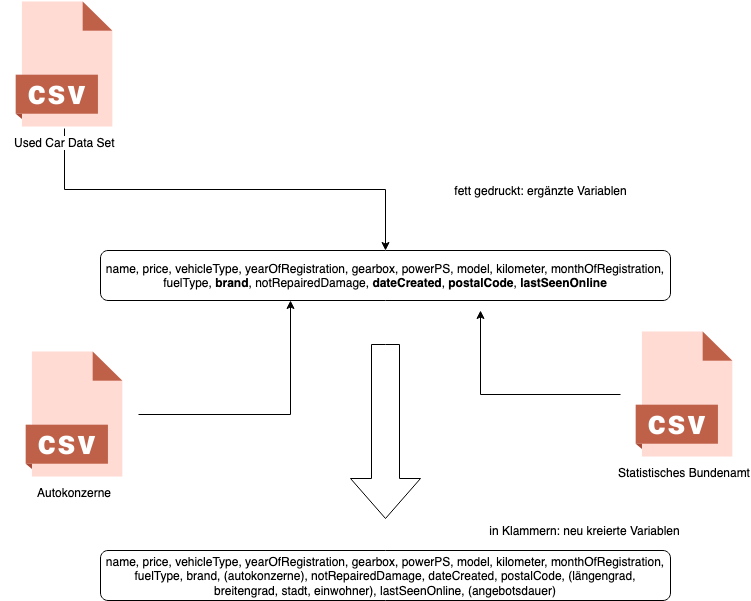

### 4. Analyse des Marktes

Bei der Analyse des Marktes handelt es sich um eine deskriptive statistische Anaylse mit Häufigkeiten und relativen Häufigkeiten.

Zeitraum der Analyse:


#### 4.1 Marktcharakteristika

Um einen Eindruck von den Daten zu bekommen, werden in diesem Abschnitt zunächst Marktcharakteristika aufgezeigt und folgende Fragestellungen aus dem Use Case übernommen:

Welche Automobil-Marken gibt es im Gebrauchtwagenmarkt?

Wie stellt sich die Verteilung der Marktanteile in Bezug auf Marken und Automobilkonzerne dar?


##### 4.1.1 Welche Automobil-Marken gibt es im Gebrauchtwagenmarkt?

(Verteilung bei normalen Fahrzeugen und Oldtimern)

In [116]:
print('Normale Fahrzeuge:')
print()
print(df_normalCars['brand'].value_counts())
print('-----------------')
print()
print('Oldtimer:')
print()
print(df_oldtimerCars['brand'].value_counts())

Normale Fahrzeuge:

volkswagen        68247
bmw               36199
opel              34113
mercedes_benz     31282
audi              29690
ford              22087
renault           15362
peugeot            9970
fiat               8172
seat               6156
skoda              5286
mazda              5082
smart              4761
citroen            4512
nissan             4502
toyota             4337
hyundai            3340
mini               3173
volvo              2971
mitsubishi         2698
honda              2453
kia                2309
suzuki             2066
alfa_romeo         1963
sonstige_autos     1954
porsche            1826
chevrolet          1505
chrysler           1238
saab                960
dacia               843
jeep                699
daihatsu            696
land_rover          694
subaru              686
jaguar              529
daewoo              471
rover               396
lancia              395
trabant             269
lada                167
Name: brand, dtype: 

##### 4.1.2 Wie stellt sich die Verteilung der Marktanteile in Bezug auf Marken und Automobilkonzerne dar?

Zunächst werden die Häufigkeiten und Marktanteile in Bezug auf Marken bei normalen PKW dargestellt:

In [135]:
df_normalCarsCount = np.round(df_normalCars.groupby(['company', "brand"])["name"].count())
#df_normalCarsRelCount = np.percentile(df_normalCarsCount)

df_normalCarsPivot = pd.concat([df_normalCarsCount],axis=1)
df_normalCarsPivot.columns = ['Count']
df_normalCarsPivot['Count'].value_counts
Total = df_normalCarsPivot['Count'].sum()
df_normalCarsPivot['Anteil'] = df_normalCarsPivot['Count'] / Total *100
df_normalCarsPivot

Count     Anteil
company                     brand                           
-                           sonstige_autos   1954   0.602977
Aufgelöste-Konzerne         saab              480   0.148121
                            trabant           269   0.083010
BMW-Konzern                 bmw             36199  11.170497
                            mini             3173   0.979143
Daimler-Konzern             mercedes_benz   31282   9.653180
                            smart            4761   1.469177
Fiat-Chrysler-Konzern       alfa_romeo       1963   0.605754
                            chrysler         1238   0.382029
                            fiat             8172   2.521763
                            jeep              699   0.215701
                            lancia            395   0.121891
Ford-Konzern                ford            22087   6.815734
Geely-Konzern               volvo            2971   0.916808
General Motors-Konzern      chevrolet        1505   0.464422
                            daewoo            471   0.145344
                            saab              480   0.148121
Honda-Konzern               honda            2453   0.756961
Hyundai-Konzern             hyundai          3340   1.030677
                            kia              2309   0.712525
Mazda-Konzern               mazda            5082   1.568233
PSA Peugeot Citroen-Konzern citroen          4512   1.392339
                            peugeot          9970   3.076600
Renault-Nissan-Gruppe       dacia             843   0.260138
                            lada              167   0.051534
                            mitsubishi       2698   0.832564
                            nissan           4502   1.389253
                            opel            34113  10.526787
                            renault         15362   4.740495
Subaru-Konzern              subaru            686   0.211690
Suzuki-Konzern              suzuki           2066   0.637538
Tata Motors-Konzern         jaguar            529   0.163242
                            land_rover        694   0.214159
                            rover             396   0.122200
Toyota-Konzern              daihatsu          696   0.214776
                            toyota           4337   1.338337
VW-Konzern                  audi            29690   9.161912
                            porsche          1826   0.563478
                            seat             6156   1.899654
                            skoda            5286   1.631184
                            volkswagen      68247  21.060054

Im Anschluss werden die Häufigkeiten und Marktanteile in Bezug auf Marken bei Oldtimern dargestellt:

In [154]:
df_oldtimerCarsCount = np.round(df_oldtimerCars.groupby(['company', "brand"])["name"].count())
#df_oldtimerCarsRelCount = np.percentile(df_oldtimerCarsCount)

df_oldtimerCarsPivot = pd.concat([df_oldtimerCarsCount],axis=1)
df_oldtimerCarsPivot.columns = ['Count']
df_oldtimerCarsPivot['Count'].value_counts
Total2 = df_oldtimerCarsPivot['Count'].sum()
df_oldtimerCarsPivot['Anteil'] = df_oldtimerCarsPivot['Count'] / Total2  *100
df_oldtimerCarsPivot

Count     Anteil
company                     brand                           
-                           sonstige_autos    835  13.925951
Aufgelöste-Konzerne         saab               13   0.216811
                            trabant           178   2.968646
BMW-Konzern                 bmw               278   4.636424
                            mini               17   0.283522
Daimler-Konzern             mercedes_benz    1041  17.361574
Fiat-Chrysler-Konzern       alfa_romeo         99   1.651101
                            chrysler           26   0.433622
                            fiat              240   4.002668
                            jeep               39   0.650434
                            lancia             25   0.416945
Ford-Konzern                ford              417   6.954636
Geely-Konzern               volvo              77   1.284189
General Motors-Konzern      chevrolet         174   2.901935
                            saab               13   0.216811
Honda-Konzern               honda              15   0.250167
Hyundai-Konzern             kia                 1   0.016678
Mazda-Konzern               mazda              17   0.283522
PSA Peugeot Citroen-Konzern citroen           112   1.867912
                            peugeot            26   0.433622
Renault-Nissan-Gruppe       lada               28   0.466978
                            mitsubishi          8   0.133422
                            nissan             12   0.200133
                            opel              471   7.855237
                            renault            74   1.234156
Subaru-Konzern              subaru              4   0.066711
Suzuki-Konzern              suzuki             32   0.533689
Tata Motors-Konzern         jaguar             54   0.900600
                            land_rover         35   0.583722
                            rover               7   0.116744
Toyota-Konzern              daihatsu            1   0.016678
                            toyota             35   0.583722
VW-Konzern                  audi              139   2.318212
                            porsche           243   4.052702
                            seat                1   0.016678
                            skoda              22   0.366911
                            volkswagen       1187  19.796531

Relative Häufigkeit bei Konzernen

In [137]:
df_normalCarsKonzernCount = np.round(df_normalCars.groupby(['company', ])["name"].count())
#df_normalCarsRelCount = np.percentile(df_normalCarsCount)

df_normalCarsKonzernPivot = pd.concat([df_normalCarsKonzernCount],axis=1)
df_normalCarsKonzernPivot.columns = ['Count']
df_normalCarsKonzernPivot['Count'].value_counts
Total = df_normalCarsKonzernPivot['Count'].sum()
df_normalCarsKonzernPivot['Anteil'] = df_normalCarsKonzernPivot['Count'] / Total *100
df_normalCarsKonzernPivot

Count     Anteil
company                                       
-                              1954   0.602977
Aufgelöste-Konzerne             749   0.231131
BMW-Konzern                   39372  12.149639
Daimler-Konzern               36043  11.122357
Fiat-Chrysler-Konzern         12467   3.847139
Ford-Konzern                  22087   6.815734
Geely-Konzern                  2971   0.916808
General Motors-Konzern         2456   0.757887
Honda-Konzern                  2453   0.756961
Hyundai-Konzern                5649   1.743201
Mazda-Konzern                  5082   1.568233
PSA Peugeot Citroen-Konzern   14482   4.468939
Renault-Nissan-Gruppe         57685  17.800771
Subaru-Konzern                  686   0.211690
Suzuki-Konzern                 2066   0.637538
Tata Motors-Konzern            1619   0.499600
Toyota-Konzern                 5033   1.553112
VW-Konzern                   111205  34.316282

Relative Häufigkeiten bei Oltimern in Bezug auf Automobil-Konzerne

In [155]:
df_oldtimerCarsKonzernCount = np.round(df_oldtimerCars.groupby(['company', ])["name"].count())
#df_normalCarsRelCount = np.percentile(df_normalCarsCount)

df_oldtimerCarsKonzernPivot = pd.concat([df_oldtimerCarsKonzernCount],axis=1)
df_oldtimerCarsKonzernPivot.columns = ['Count']
df_oldtimerCarsKonzernPivot['Count'].value_counts
Total = df_oldtimerCarsKonzernPivot['Count'].sum()
df_oldtimerCarsKonzernPivot['Anteil'] = df_oldtimerCarsKonzernPivot['Count'] / Total *100
df_oldtimerCarsKonzernPivot

Count     Anteil
company                                      
-                              835  13.925951
Aufgelöste-Konzerne            191   3.185457
BMW-Konzern                    295   4.919947
Daimler-Konzern               1041  17.361574
Fiat-Chrysler-Konzern          429   7.154770
Ford-Konzern                   417   6.954636
Geely-Konzern                   77   1.284189
General Motors-Konzern         187   3.118746
Honda-Konzern                   15   0.250167
Hyundai-Konzern                  1   0.016678
Mazda-Konzern                   17   0.283522
PSA Peugeot Citroen-Konzern    138   2.301534
Renault-Nissan-Gruppe          593   9.889927
Subaru-Konzern                   4   0.066711
Suzuki-Konzern                  32   0.533689
Tata Motors-Konzern             96   1.601067
Toyota-Konzern                  36   0.600400
VW-Konzern                    1592  26.551034

##### 4.1.3 Ab hier weiter mit weiteren Statistiken aus Pandas

2. Analyse: Was sind die Minimalpreise und Maximalpreise der einzelnen Marken. Was ist der Durchschnitt?

In [118]:
# zu viele komische Modelle, besser auf einzelne Marken gehen 
# -> siehe weiter unten bei Mercedes
df_normalCarsMin = df_normalCars.groupby(by="brand")["price"].min()
df_normalCarsMax = df_normalCars.groupby(by="brand")["price"].max()
df_normalCarsMean = np.round(df_normalCars.groupby(by="brand")["price"].mean())

descStats = pd.concat([df_normalCarsMin,df_normalCarsMax, df_normalCarsMean],axis=1)
descStats.columns = ['Min', 'Max', 'Mean']

descStats

Min     Max     Mean
brand                               
alfa_romeo      100   55800   3848.0
audi            100  323223   9274.0
bmw             100  390000   8616.0
chevrolet       225   59999   6229.0
chrysler        100   34900   4063.0
citroen         100   38888   3661.0
dacia           500   19990   5946.0
daewoo          100    3850   1071.0
daihatsu        100   12850   1853.0
fiat            100   35000   2842.0
ford            100   70999   3637.0
honda           100   48500   4128.0
hyundai         100   35999   5641.0
jaguar          199  466000  12197.0
jeep            200   59800  11314.0
kia             100   43900   5948.0
lada            199   12000   3346.0
lancia          100   64000   3146.0
land_rover      220  120000  16892.0
mazda           100   38900   4177.0
mercedes_benz   100  368000   8549.0
mini            100   45000  10099.0
mitsubishi      100  130000   3530.0
nissan          100   99999   4789.0
opel            100   38990   3041.0
peugeot         100   31500   3329.0
porsche         140  488997  43037.0
renault         100  110000   2493.0
rover           100   28900   1654.0
saab            150   29900   3935.0
seat            100  154651   4639.0
skoda           100  145000   6581.0
smart           100  100000   3688.0
sonstige_autos  100  440000  16082.0
subaru          100   38333   4577.0
suzuki          100  111111   4181.0
toyota          125  160000   5349.0
trabant         100   14500   2008.0
volkswagen      100  208250   5514.0
volvo           100   65400   5294.0

In [119]:
# zu viele komische Modelle, besser auf einzelne Marken gehen 
# -> siehe weiter unten bei Mercedes
df_normalCarsMin = df_normalCars.groupby(by="model")["price"].min()
df_normalCarsMax = df_normalCars.groupby(by="model")["price"].max()
df_normalCarsMean = np.round(df_normalCars.groupby(by="model")["price"].mean())

descStats = pd.concat([df_normalCarsMin,df_normalCarsMax, df_normalCarsMean],axis=1)
descStats.columns = ['Min', 'Max', 'Mean']

descStats

Min     Max     Mean
model                             
-             100  487000   5126.0
100           150    8999   1685.0
145           100    5000    968.0
147           150   11900   2366.0
156           100   12950   1646.0
159          1800   17450   7251.0
1_reihe       100   11000   1710.0
1er           112   59800  11375.0
200          1000    9500   3887.0
2_reihe       100   20000   3268.0
300c          150   34900  10803.0
3_reihe       100   27900   3436.0
3er           100  123456   6182.0
4_reihe       150   26950   3614.0
500           128   28000   8113.0
5_reihe       175   28600   8340.0
5er           100   51000   8404.0
601           100   14500   1923.0
6_reihe       100   30900   3796.0
6er          2000   81900  24194.0
7er           455   58500   9482.0
80            100   27500   1467.0
850           100   16000   1564.0
90            100  323223   6245.0
900           150   19900   3181.0
9000          199    5450   2721.0
911           220  488997  65041.0
a1            200   26600  14261.0
a2            200   14250   3917.0
a3            100   46999   8017.0
...           ...     ...      ...
toledo        100   13384   2251.0
touareg       780   79499  15645.0
touran        150   36400   7672.0
transit       100   28900   4814.0
transporter   100  208250  10337.0
tt            323   54950  13684.0
tucson       1200   35200   7218.0
twingo        100   12000   1493.0
up            122   14400   8007.0
v40           100   27900   1808.0
v50          1800   15550   6158.0
v60          1000   49700  16490.0
v70           100   35500   4531.0
v_klasse      550   89000   8557.0
vectra        100   15999   1791.0
verso         850   27000   7220.0
viano         250   53900  18674.0
vito          150   34900   6786.0
vivaro        750   29750   8130.0
voyager       100   32000   2123.0
wrangler     1000   49900  17691.0
x_reihe       270  250000  17979.0
x_trail       100   99999   7443.0
x_type        450   53000   5816.0
xc_reihe      414   65400  15066.0
yaris         400   16300   3914.0
yeti         1750   27900  14566.0
ypsilon       100    8800   1473.0
z_reihe       200  390000  15558.0
zafira        120   25200   3911.0

[249 rows x 3 columns]

weitere Marktcharakteristika:

    Wie sieht die Verteilung bei Diesel und Benzin aus?
    Welche Fahrzeugform haben die Autos?
    Wie viel PS haben die Autos?
    Wie lange ist eine Anzeige durchschnittlich online, bis das Auto verkauft wird?


In [125]:
#df_normalCarsPivot['Count'].value_counts
#Total = df_normalCarsPivot['Count'].sum()
#df_normalCarsPivot['Anteil'] = df_normalCarsPivot['Count'] / Total *100
#df_normalCarsPivot['KonzernCount'] = df_normalCarsPivot.groupby(['company'])['Count'].count()
#df_normalCarsPivot

In [122]:
#Anschließend holen resetten wir die Struktur des soeben erstellten Index 
df_normalCarsPivot = df_normalCarsPivot.reset_index()
#und legen die nachfolgende Struktur fest
#df_normalCarsPivot = df_normalCarsPivot.pivot(index='company', columns='brand', values='Count')
df_normalCarsPivot.head(30)

company           brand  Count     Anteil  \
0                             -  sonstige_autos   1954   0.602977   
1           Aufgelöste-Konzerne            saab    480   0.148121   
2           Aufgelöste-Konzerne         trabant    269   0.083010   
3                   BMW-Konzern             bmw  36199  11.170497   
4                   BMW-Konzern            mini   3173   0.979143   
5               Daimler-Konzern   mercedes_benz  31282   9.653180   
6               Daimler-Konzern           smart   4761   1.469177   
7         Fiat-Chrysler-Konzern      alfa_romeo   1963   0.605754   
8         Fiat-Chrysler-Konzern        chrysler   1238   0.382029   
9         Fiat-Chrysler-Konzern            fiat   8172   2.521763   
10        Fiat-Chrysler-Konzern            jeep    699   0.215701   
11        Fiat-Chrysler-Konzern          lancia    395   0.121891   
12                 Ford-Konzern            ford  22087   6.815734   
13                Geely-Konzern           volvo   2971   0.916808   
14       General Motors-Konzern       chevrolet   1505   0.464422   
15       General Motors-Konzern          daewoo    471   0.145344   
16       General Motors-Konzern            saab    480   0.148121   
17                Honda-Konzern           honda   2453   0.756961   
18              Hyundai-Konzern         hyundai   3340   1.030677   
19              Hyundai-Konzern             kia   2309   0.712525   
20                Mazda-Konzern           mazda   5082   1.568233   
21  PSA Peugeot Citroen-Konzern         citroen   4512   1.392339   
22  PSA Peugeot Citroen-Konzern         peugeot   9970   3.076600   
23        Renault-Nissan-Gruppe           dacia    843   0.260138   
24        Renault-Nissan-Gruppe            lada    167   0.051534   
25        Renault-Nissan-Gruppe      mitsubishi   2698   0.832564   
26        Renault-Nissan-Gruppe          nissan   4502   1.389253   
27        Renault-Nissan-Gruppe            opel  34113  10.526787   
28        Renault-Nissan-Gruppe         renault  15362   4.740495   
29               Subaru-Konzern          subaru    686   0.211690   

    KonzernCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN  
6            NaN  
7            NaN  
8            NaN  
9            NaN  
10           NaN  
11           NaN  
12           NaN  
13           NaN  
14           NaN  
15           NaN  
16           NaN  
17           NaN  
18           NaN  
19           NaN  
20           NaN  
21           NaN  
22           NaN  
23           NaN  
24           NaN  
25           NaN  
26           NaN  
27           NaN  
28           NaN  
29           NaN

In [123]:
df_normalCarsPivot = df_normalCarsPivot.pivot(index='yearOfRegistration', columns='model', values='Mean')
#mercedesStatsPivot.head(30)

#mercedesStatsPivot = pd.concat([df_mercedesMean],axis=1)
#mercedesStatsPivot.columns = ['Mean']



KeyError: 'yearOfRegistration'

In [ ]:
#Könnten wir ein pie chart drauß machen mit denen > 10.000 (Rest Sonstige)
df_normalCars['brand'].value_counts()

In [ ]:
df_oldtimerCars['brand'].value_counts()

#### 4.2 Visualisierung der Ergebnisse.

#### 4.3 Wir wollen Abweichungen von Durchschnittspreis berechnen und damit günstige Angebote lokalisieren.
#### 4.4 Wir rechnen Korrelationen, um Zusammenhänge aufzudecken, welche Attribute einen Einfluss auf die Preissetzung haben.


Fragestellungen zum Auswerten (Werden auf statista gegen Geld angeboten):

- Wie viele Gebrauchtfahrzeuge werden pro Jahr in Deutschland verkauft?
- Wie ist das Durchschnittsalter von Gebrauchtwagen?
- Wie ist der durchschnittliche Kilometerstand von Gebrauchtwagen im Privatmarkt?
- Wie ist der durchschnittliche Verkaufspreis der Fahrzeuge im Privatmarkt?
- Wo sind die Peise am teuersten, wo am günstigsten?
Die letzte Frage könnte man mit eine Deutschlandkarte verbinden (Plot mit geopy). Man muss aber definieren, was teuer und was günstig heißt.
Hier können wir Variablen mit dem Durchschnittswerten je Modell (bspw. Golf oder Polo) bilden und dann schauen, wo es die größten abweichungen von diesem Modell gibt.
Diese Abweichungen können dann vorgeschlagen werden und anhand der geodaten die Entfernung von Stuttgart gleich angegeben werden. 


4.2 Zusammenhänge - Korrelationen

Welche Merkmale haben einen Einfluss auf den Preis. 

Zunächst Betrachtung der metrischen Variablen.


Wir haben nun bspw. bei Mercedes mittlere Korrelationen bei Jahr, PS und Kilometer :-)

PLZ und Angebotsdauer müssen umcodiert werden.

Damit würden sich dann auch eine Regression bauen lassen.
Vorher Test auf Normalverteilung
multicolinearität


In [ ]:
#Wie können wir verschiedene Marken oder Modelle auswerten? 
#Gibt es da eine bessere Prgrammierung oder muss man immer einen DF bauen?

df_mercedes = df_normalCars.loc[df_normalCars['brand'] == 'mercedes_benz']

corr = df_mercedes.corr()
corr.style.background_gradient()

In [ ]:
df_mercedes.describe()

In [ ]:
df_mercedesOld = df_oldtimerCars.loc[df_oldtimerCars['brand'] == 'mercedes_benz']

corr = df_mercedesOld.corr()
corr.style.background_gradient()

Bei Oldtimern kehrt sich der Effekt beim Zulassungsjahr um, das heißt je älter, desto höher der positve Zusammenhang zum Preis.
Im Normalwagen Segment hingegen haben jüngere Autos einen positiven Zusammenhang mit dem Preis.

In [ ]:
#df_normalCarsSum = df_normalCars.groupby(by="model")["price"].sum()
df_mercedesMin = df_mercedes.groupby(by="model")["price"].min()
df_mercedesMax = df_mercedes.groupby(by="model")["price"].max()
df_mercedesMean = np.round(df_mercedes.groupby(by="model")["price"].mean())

mercedesStats = pd.concat([df_mercedesMin,df_mercedesMax, df_mercedesMean],axis=1)
mercedesStats.columns = ['Min', 'Max', 'Mean']

mercedesStats

### Chris Anpassungen bzw. Code Fragmente

In [ ]:
df_mercedesMean = np.round(df_mercedes.groupby(['model', 'yearOfRegistration'])["price"].mean())

mercedesStatsPivot = pd.concat([df_mercedesMean],axis=1)
mercedesStatsPivot.columns = ['Mean']

mercedesStatsPivot.head()

In [ ]:
#Anschließend holen resetten wir die Struktur des soeben erstellten Index 
mercedesStatsPivot = mercedesStatsPivot.reset_index()
#und legen die nachfolgende Struktur fest
mercedesStatsPivot = mercedesStatsPivot.pivot(index='yearOfRegistration', columns='model', values='Mean')
mercedesStatsPivot.head(30)

In [ ]:
import matplotlib.pyplot as plt
mercedesStatsPivot.plot(figsize=(16, 9), title='Preisentwicklung Gebrauchtwagen Mercedes');

# Show y-axis in 'plain' format instead of 'scientific'
plt.ticklabel_format(style='plain', axis='y')

Die Grafik ist jetzt vielleicht nicht so ansehnlich, aber so oder so ähnlich könnten wir DFs bauen und dann entsprechend visualisieren. 

### Multiindexing

In [ ]:
#df_normalCars.reset_index()
#Hilfreiche Links:
#https://www.datacamp.com/community/tutorials/pandas-multi-index
#https://www.somebits.com/~nelson/pandas-multiindex-slice-demo.html
#https://janakiev.com/blog/pandas-multiindex-pivot/ --> besonders zum Visualisieren geeignet. 
multiIdx_normalCars = df_normalCars.set_index(['company', 'brand','model', 'yearOfRegistration', 'name'])
multiIdx_normalCars.sort_index(inplace=True)

multiIdx_normalCars

In [ ]:
#Diese Suche zeigt uns alle Golfs, mit einem Registrierungsdatum aus 2014
#Könnten uns hier überlegen ob wir das Jahr der Anzeigenerstellung in einer extra Spalte brauchen,
#um dahingehend Kennzahlen zu brauchen (Differenz yearOfRegistration und VerkaufsanzeigenJahr)
multiIdx_normalCars.loc[('VW-Konzern', 'volkswagen', 'golf', 2015),:]

Idee...

Man könnte mit der Formel basierend auf den Verkaufspreisen den ursprünglichen Neuwagenpreis errechnen. Allerdings ist das schon sehr generell, da diese aus dem gesamten Datensatz abgeleitet wurde.
http://orgesleka.blogspot.com/2016/11/tabelle-zum-wertverlust-pro-jahr-bei.html

Eine individuelle regression zu bauen geht aus meiner Sicht über das Assignment hinausnicht.

In [ ]:
#Ausprägungen einer Spalte anzeigen lassen
df_carData["brand"].value_counts()

# Spalte PS ist ebenfalls auffällig, entweder falsch befüllt oder Schwachsinn
0= fehlender Wertn, alles größer 700 können wir in Wert 0 umwandeln